<h2>1. Student academic performance data analysis</h2>
<li>1. Convert it into a DataFrame using Pandas.</li>
<li>2. Understanding the characteristics of the data.</li>
<li>3. Check for missing data and preprocess if necessary.</li>
<li>4. Calculate basic descriptive statistics such as mean, median, mode, etc.</li>
<li>5. Visualize with a box plot.</li>
<li>6. Measure the relationships between data columns.</li>
<li>7. Visualize the desired variables for comparison with histograms and scatter plots.</li>

<h3>Prepare data for practice</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic', cache=True)
df.head()
df.shape

(891, 15)

<h3>Checking for missing data</h3>

In [2]:
df['age'].value_counts(dropna=False)
df['deck'].value_counts(dropna=True)

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

<h1>6. Finding missing data</h1>
<h3>isnull() : Returns 'True' for missing data.</h3>
<h3>notnull() : Returns 'False' for missing data.</h3>

In [3]:
df.isnull()
df.notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


<h3>The 'sum()' method treats 'True' and 'False' as 1 and 0, respectively, and returns the sum of NaN values for each column.</h3>

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.isnull().sum().sum() #1
(len(df) - df.count()).sum() #2

869

DataFrame.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

In [6]:
new_df = df.dropna(axis = 1, thresh = 500)
new_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [7]:
age_df = df.dropna(axis = 0, how = 'any', subset = ['age'])
len(age_df)

714

<h2>7. Deleting missing data</h2>


In [8]:
# - When called without any parameters, it operates by 
# default in the row direction and deletes the row if it contains any NaN values.
# - In other words, if a row contains any NaN values, that row is deleted.

no = df.dropna()
no.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
len(no) # 182
no = df.dropna(axis = 0 , how = 'any')
len(no) # 182

182

<h2>8. Replacing (substituting) missing data with other data</h2>
<li>Deleting entire columns or rows with missing data during the data preprocessing stage
can reduce the size of the dataset, which may not be desirable for the analysis.
</li>
<li>On the other hand, replacing NaN data with fixed values like 0 or 1 can significantly affect data analysis.</li>
<li>Therefore, it is common to fill missing data with values that represent the distribution and characteristics of the dataset, such as mean or mode values.</li>
<h3>DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)</h3>
<li>We can use the 'fillna' method in a DataFrame to replace missing data with other values.</li>

In [10]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache=True)

df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [11]:
avg_age = df['age'].mean(axis = 0)
avg_age

29.69911764705882

In [12]:
median_age = df['age'].median(axis = 0)
median_age


28.0

In [13]:
df['age'].fillna(avg_age, inplace=True)
df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [14]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<h3>DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None</h3>

In [15]:
# 'value_counts' method returns a series that shows the count of unique
# occurrences of each row in the column, it excludes mussing data. 

town_count = df['embark_town'].value_counts(dropna=True)
town_count

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [16]:
type(town_count)

most = town_count.idxmax()
most

'Southampton'

In [17]:
df['embark_town'].fillna(most, inplace=True)

df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

<h3>DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)</h3>
<li>'ffill' (forward fill): Replaces missing values with the nearest valid value in the forward direction.
it fills missing values with the previous value.</li>
<li>'bfill' (backward fill) : Replaces missing values with the nearest valid value in the backward
direction. It fills missing values with the following value.</li>

In [18]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache=True)
null_indexes = df[df['embark_town'].isna()].index
null_indexes

Index([61, 829], dtype='int64')

In [19]:
df['embark_town'].fillna(method = 'bfill', inplace=True)
df[60: 63]

/var/folders/r2/yjkb7s3n0kddn60mc73xzp2w0000gn/T/ipykernel_812/2354376091.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embark_town'].fillna(method = 'bfill', inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,Southampton,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False


<h2>Let's Code</h2>
<h3>Mission</h3>
<p>1. Convert the 'student-mat.csv file', which contains student performance achievement data, into a dataframe using pandas.</p>
<p>2. Understand the characteristics of the data.</p>
<p>3. Check for missing data and perform data preprocessing if necessary.</p>
<p>4. Calculate basic descriptive statistics such as mean, median, mode, variance, and standard deviation.</p>
<p>5. Visualize the data using box plots.</p>
<p>6. Measure the relationships between data columns.</p>
<p>7. Visualize the desired variables for comparison using histograms and scatter plots.</p>

<h2>Answer</h2>
<h3>1. Convert the 'student-mat.csv' file into a DataFrame</h3>

In [20]:
import pandas as pd

# Load the CSV file into a DataFrame
df_students = pd.read_csv('student-mat.csv')


<h3>2. Understand the characteristics of the data</h3>

In [21]:
# Display the first few rows of the DataFrame
print(df_students.head())

# Display the DataFrame's info to understand data types and non-null counts
print(df_students.info())

# Get a description of data in DataFrame
print(df_students.describe())

  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...                            

<h3>3. Check for missing data and perform data preprocessing if necessary</h3>

In [22]:
# Check for missing values
print(df_students.isnull().sum())

# Example of dropping rows with any missing values
df_students.dropna(inplace=True)

# Alternatively, fill missing values if appropriate
# df_students.fillna(value={'column_name': value}, inplace=True)

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64


<h3>Finalized Code
</h3>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv('./student-mat.csv', sep = ';')
print(student_data.head())

print('\n *** Basic imformation for data ***')
print(student_data.info())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

 *** Basic imformation for data ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

In [24]:
print('\n *** Missing data ***')
print(student_data.isnull().sum())


 *** Missing data ***
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


Text(0, 0.5, 'count')

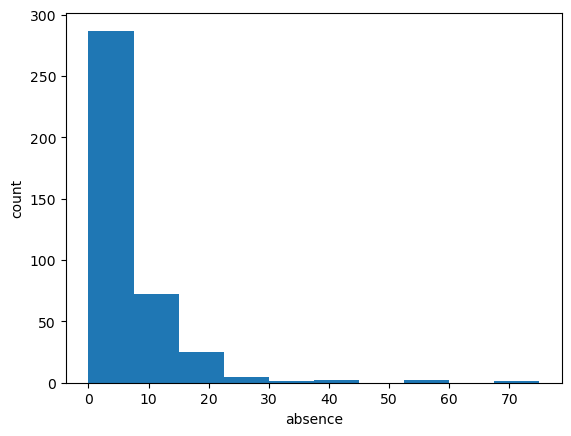

In [25]:
plt.hist(student_data['absences'])
plt.xlabel('absence')
plt.ylabel('count')

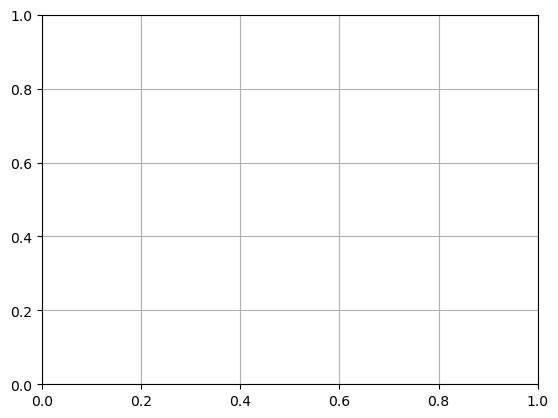

In [26]:
plt.grid(True)
plt.show()

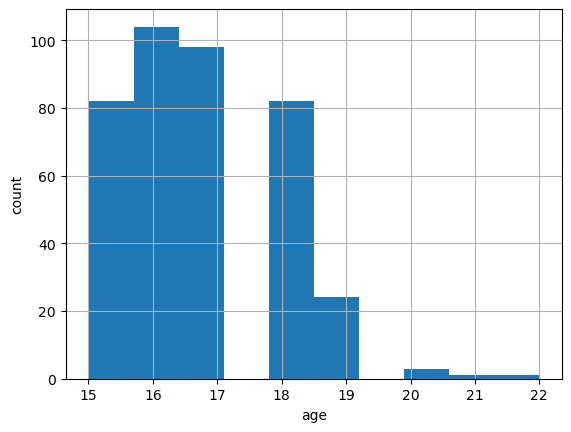

In [27]:
plt.hist(student_data['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.grid(True)
plt.show()

In [28]:
print("\n*** Technical Statistics Summary Information ***")
print(student_data.describe())
print('\n => The median of "studytime": ', student_data['studytime'].median())
print('\n => The mean of "studytime": ', student_data['studytime'].mean())
print('\n => The mode of "studytime": ', student_data['studytime'].mode())
print('\n => The variance of "studytime": ', student_data['studytime'].var())
print('\n => The standard deviation of "studytime": ', student_data['studytime'].std())


*** Technical Statistics Summary Information ***
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2

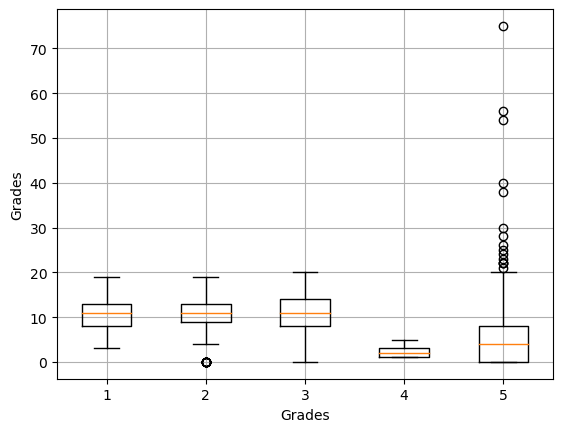

In [29]:
plt.boxplot([student_data['G1'], student_data['G2'], student_data['G3'], \
    student_data['Walc'], student_data['absences']])
plt.xlabel('Grades')
plt.ylabel('Grades')
plt.grid(True)
plt.show()

In [30]:
print('\n *** Ceffocient of variation ***')
cv = student_data.std(numeric_only=True) / student_data.mean(numeric_only=True)
print(cv)


 *** Ceffocient of variation ***
age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64


In [31]:

print('\n *** Covariance ***')
print(student_data.cov(min_periods = None, ddof = 1, numeric_only = True))
print('\n => Covariance of grades in the first and third semesters:')
print(np.cov(student_data['G1'], student_data['G3']))
print('\n => Variance on First-semester grades:', student_data['G1'].var())
print('\n => Variance on Third-semester grades:', student_data['G3'].var())


 *** Covariance ***
                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.628285 -0.228619 -0.226949    0.062873  -0.004434  0.231221   
Medu       -0.228619  1.198445  0.742717   -0.131061   0.059667 -0.192681   
Fedu       -0.226949  0.742717  1.184180   -0.120073  -0.008379 -0.202641   
traveltime  0.062873 -0.131061 -0.120073    0.486513  -0.059070  0.047844   
studytime  -0.004434  0.059667 -0.008379   -0.059070   0.704324 -0.108321   
failures    0.231221 -0.192681 -0.202641    0.047844  -0.108321  0.553017   
famrel      0.061717 -0.003842 -0.001337   -0.010512   0.029898 -0.029564   
freetime    0.020947  0.033779 -0.013963   -0.011861  -0.120041  0.068329   
goout       0.180364  0.078115  0.052220    0.022162  -0.059706  0.103123   
Dalc        0.149039  0.019341  0.002313    0.085941  -0.146533  0.090118   
Walc        0.192733 -0.066440 -0.017702    0.120478  -0.274304  0.135964   
health     -0.110326 -0.071349  0.022303    0.007274  -